<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module1_Lab2_AIML-/blob/main/MODULE_1_LAB_2_(AIML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1, Lab 2**
# **Machine Learning terms and metrics & Data Augmentation**

# Section 1 - Machine Learning terms and matrics

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
rng=np.random.default_rng(seed=40)

In [ ]:
dataset=datasets.fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print("Original target values:",dataset.target)
dataset.target=dataset.target.astype(int)
print("Target values after conversion:",dataset.target)
print("Input variables shape:",dataset.data.shape)
print("Output variables shape:",dataset.target.shape)

Original target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [ ]:
def NN1(traindata,trainlabel,query):
    diff=traindata-query
    sq=diff*diff
    dist=sq.sum(axis=1)
    label=trainlabel[dist.argmin()]
    return label
def NN(traindata,trainlabel,testdata):
  predlabel=np.array([NN1(traindata,trainlabel,i) for i in testdata])
  return predlabel

In [ ]:
def RandomClassifier(traindata,trainlabel,testdata):
  classes=np.unique(trainlabel)
  rints=rng.integers(low=0,high=len(classes),size=len(testdata))
  predlabel=classes[rints]
  return predlabel

In [ ]:
def Accuracy(gtlabel,predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the ground-truth labels and predicted labels should be the same"
  correct=(
    gtlabel==predlabel
    ).sum()
  return correct/len(gtlabel)


In [ ]:
import numpy as np
def split(traindata,trainlabel, percent):
  rnd = np.random.rand(len(trainlabel))
  split1 = rnd < percent
  split2 = rnd >= percent
  split1data = traindata[split1]
  split2data = traindata[split2]
  split1label = trainlabel[split1]
  split2label =trainlabel[split2]
  return split1data, split1label, split2data, split2label

testdata,testlabel,alltraindata,alltrainlabel=split(
    dataset.data,dataset.target,20/100
    )
print("Number of test samples:",len(testlabel))
print("Number of training samples:",len(alltrainlabel))
print("Percent of test data:",len(testlabel)*100/len(dataset.target),"%")

Number of test samples: 4171
Number of training samples: 16469
Percent of test data: 20.208333333333332 %


# Experiments with splits

In [ ]:
import numpy as np
def split(traindata,trainlabel, percent):
  rnd = np.random.rand(len(trainlabel))
  split1 = rnd < percent
  split2 = rnd >= percent
  split1data = traindata[split1]
  split2data = traindata[split2]
  split1label = trainlabel[split1]
  split2label =trainlabel[split2]
  return split1data, split1label, split2data, split2label

In [ ]:
traindata,trainlabel,valdata,vallabel=split(
 alltraindata,alltrainlabel,75/100)

In [ ]:
trainpred=NN(traindata,trainlabel,traindata)
trainAccuracy=Accuracy(trainlabel,trainpred)
print("Train accuracy:",trainAccuracy*100,"%")
trainpred=RandomClassifier(traindata,trainlabel,traindata)
trainAccuracy=Accuracy(trainlabel,trainpred)
print("Train accuracy:",trainAccuracy*100,"%")

Train accuracy: 100.0 %
Train accuracy: 16.352711919454368 %


In [ ]:
valpred=NN(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print("Validation accuracy using nearest neighbour algorithm:",valAccuracy*100,"%")
valpred=RandomClassifier(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print("Validation accuracy using random classifier:",valAccuracy*100,"%")


Validation accuracy using nearest neighbour algorithm: 34.21622923188057 %
Validation accuracy using random classifier: 16.084758006260536 %


In [ ]:
traindata,trainlabel,valdata,vallabel=split(
 alltraindata,alltrainlabel,60/100)
valpred=NN(traindata,trainlabel,valdata)
valAccuracy=Accuracy(vallabel,valpred)
print("Validation accuracy using nearest neighbour algorithm:",valAccuracy*100,"%")

Validation accuracy using nearest neighbour algorithm: 34.07518796992481 %


In [ ]:
testpred=NN(alltraindata,alltrainlabel,testdata)
testAccuracy=Accuracy(testlabel,testpred)
print("Test accuracy:",testAccuracy*100,"%")

Test accuracy: 35.84272356748981 %


Try it out for yourself and answer:

1.How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

As the percentage of validation set increases, more data will available to test and gives reliable estimation.
And this reduces the amount of training data.

2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

If size of training set is little it might lead to a model that does not generalize well.If size is too little for validation set it makes difficult to perforamance accurately.

# Exercise

In [ ]:
def NN(traindata, trainlabel, testdata, k=1):
    predlabel = np.array([NNK(traindata, trainlabel, i, k) for i in testdata])
    return predlabel

def NNK(traindata, trainlabel, query, k):

    diff = traindata - query
    sq = diff ** 2
    dist = sq.sum(axis=1)
    k_indices = np.argpartition(dist, k)[:k]
    k_nearest_labels = trainlabel[k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):

    classes = np.unique(trainlabel)
    rints = np.random.randint(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel), "Lengths must match"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)
def split(data, label, percent):
    rnd = np.random.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label
train_data, train_label, test_data, test_label = split(
    dataset.data, dataset.target, 0.8
)
print("Number of test samples:", len(test_label))
print("Number of train samples:", len(train_label))
print("Percent of test data:", len(test_label) * 100 / len(dataset.target), "%")
pred_labels_nn3 = NN(train_data, train_label, test_data, k=3)
accuracy_nn3 = Accuracy(test_label, pred_labels_nn3)
pred_labels_random = RandomClassifier(train_data, train_label, test_data)
accuracy_random = Accuracy(test_label, pred_labels_random)
print(f"Accuracy of 3-NN: {accuracy_nn3 * 100:.2f}%")
print(f"Accuracy of Random Classifier: {accuracy_random * 100:.2f}%")


Number of test samples: 4140
Number of train samples: 16500
Percent of test data: 20.058139534883722 %
Accuracy of 3-NN: 34.90%
Accuracy of Random Classifier: 18.04%


# Multiple Splits

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 34.29509926297178 %
Test accuracy: 35.84272356748981 %


# Exercise

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

dataset = load_iris()


def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):

    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations
split_sizes = [0.6, 0.7, 0.75, 0.8, 0.9]
iterations = 10

results_1nn = {}
results_3nn = {}

for split_size in split_sizes:
    avg_acc_1nn = AverageAccuracy(dataset.data, dataset.target, split_size, iterations, classifier=NN)
    avg_acc_3nn = AverageAccuracy(dataset.data, dataset.target, split_size, iterations, classifier=lambda x, y, z: NN(x, y, z, k=3))
    results_1nn[split_size] = avg_acc_1nn
    results_3nn[split_size] = avg_acc_3nn

print("Average Validation Accuracies:")
for split_size in split_sizes:
    print(f"Split Size: {split_size:.2f} -> 1-NN: {results_1nn[split_size] * 100:.2f}%, 3-NN: {results_3nn[split_size] * 100:.2f}%")

train_data, train_label, test_data, test_label = split(dataset.data, dataset.target, 0.8)
test_pred_1nn = NN(train_data, train_label, test_data)
test_pred_3nn = NN(train_data, train_label, test_data, k=3)

print(f"\nTest Accuracy of 1-NN: {Accuracy(test_label, test_pred_1nn) * 100:.2f}%")
print(f"Test Accuracy of 3-NN: {Accuracy(test_label, test_pred_3nn) * 100:.2f}%")




Average Validation Accuracies:
Split Size: 0.60 -> 1-NN: 93.71%, 3-NN: 95.29%
Split Size: 0.70 -> 1-NN: 95.72%, 3-NN: 96.68%
Split Size: 0.75 -> 1-NN: 93.75%, 3-NN: 95.52%
Split Size: 0.80 -> 1-NN: 94.49%, 3-NN: 96.88%
Split Size: 0.90 -> 1-NN: 96.25%, 3-NN: 93.49%

Test Accuracy of 1-NN: 95.45%
Test Accuracy of 3-NN: 97.73%


Questions


1.Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, averaging over several splits reduces the volatility brought on by a single train-test split. Because it takes into consideration many data subsets, it offers a more reliable estimate of a classifier's performance.

2.Does it give more accurate estimate of test accuracy?

Yes, averaging yields a more generalizable performance metric by capturing the model's performance across several training and validation sets, which improves the estimate of test accuracy.



3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Yes, a more accurate estimate of the model's performance is typically obtained by increasing the number of iterations. Random fluctuations are averaged out by more rounds, which reduces the sensitivity of the results to the particular samples selected in every given split.


4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

Not totally. Although more iterations can make the accuracy estimate more robust, they are unable to make up for the absence of data. Overfitting could result from a relatively limited training dataset since the model might pick up noise instead of underlying patterns. In these situations, it's usually preferable to collect additional data if at all possible or employ methods like data augmentation or transfer learning to enhance model performance.

# Section 2- Data Augmentation

In [ ]:
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [ ]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()
train_X=train_X/250
train_Y=train_X/250
train_x=train_X[::1500,:,:].copy()
train_y=train_Y[::1500].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def NN1(traindata, trainlabel, query):
  diff = (traindata - query)
  sq = diff**2
  dist = sq.sum(1)
  # Get the index of the minimum distance relative to the original trainlabel size
  label_index = np.argmin(dist)
  #Ensure the index is within bounds of trainlabel
  label_index = min(label_index, len(trainlabel) - 1)
  label = trainlabel[label_index]
  return label

def NN(traindata, trainlabel, testdata):
  traindata = traindata.reshape(-1, 28*28) # Reshape to match MNIST image size (28x28)
  testdata = testdata.reshape(-1, 28*28)   # Reshape to match MNIST image size (28x28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

In [ ]:
def Acccuracy(getlabel,predlabel):
  assert len(getlabel)==len(predlabel), "Length of the ground-truth labels and predicted labels should be the same"
  correct=(getlabel==predlabel).sum()
  return correct/len(getlabel)


# Augmentation 1 Rotation

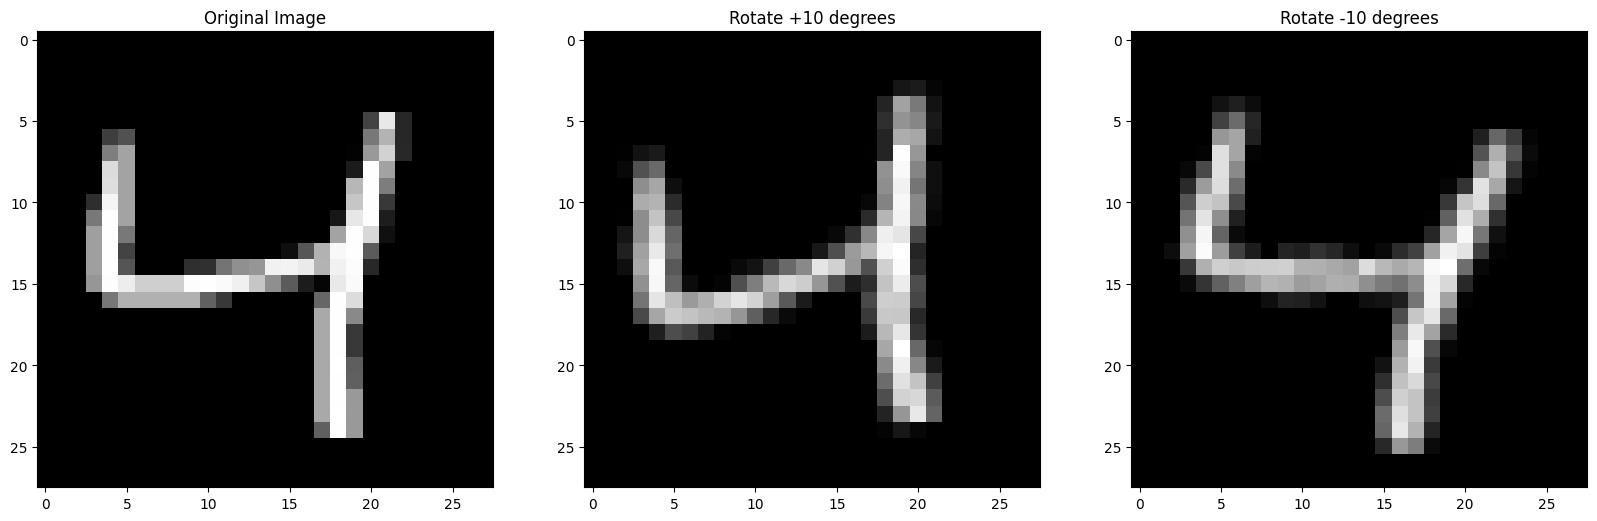

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 10))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

In [ ]:
def augRotate(sample,angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  angle=rng.random(len(sample))
  angle=(angle-0.5)*angleconstraint
  nsample=sample.copy()
  for ii in range(len(sample)):
    nsample[ii]=rotate(sample[ii],angle[ii])
  return np.squeeze(nsample)

In [ ]:
import numpy as np
from skimage.transform import rotate, resize # Import the resize function from skimage.transform
from skimage.transform import resize

def augRotate(sample,angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  angle=rng.random(len(sample))
  angle=(angle-0.5)*angleconstraint
  nsample=sample.copy()
  for ii in range(len(sample)):
    rotated_image = rotate(sample[ii],angle[ii])
    nsample[ii] = resize(rotated_image, sample[ii].shape)
  return np.squeeze(nsample)

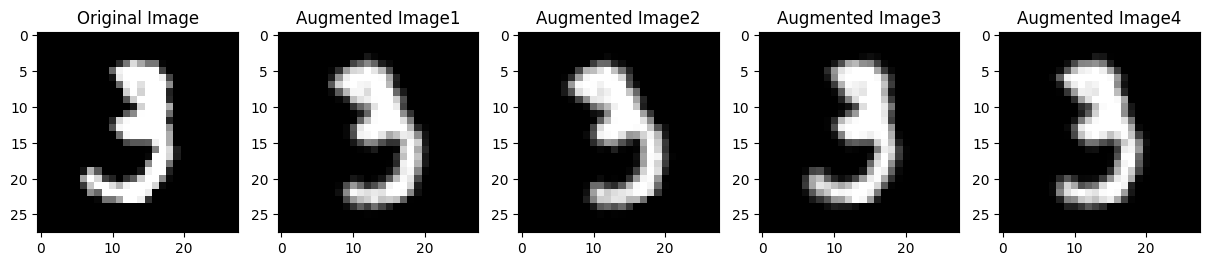

In [ ]:
sample=train_X[10]
angleconstraint=60
fig,axs=plt.subplots(1,5,figsize=(15,5))
axs[0].imshow(sample,cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(augRotate(sample,angleconstraint),cmap="gray")
axs[1].set_title("Augmented Image1")
axs[2].imshow(augRotate(sample,angleconstraint),cmap="gray")
axs[2].set_title("Augmented Image2")
axs[3].imshow(augRotate(sample,angleconstraint),cmap="gray")
axs[3].set_title("Augmented Image3")
axs[4].imshow(augRotate(sample,angleconstraint),cmap="gray")
axs[4].set_title("Augmented Image4")
plt.show()

In [ ]:
angleconstraint=70
naugmentations=6
augdata=train_X
auglabel=train_y
for ii in range(naugmentations):
  augdata=np.concatenate((augdata,augRotate(train_X,angleconstraint)))
  auglabel=np.concatenate((auglabel,train_Y))
testpred=NN(augdata,auglabel,test_X)
print("Accuracy:",Acccuracy(test_Y,testpred)*100,"%")

In [ ]:
angleconstraints=[0,1,2,3,4,5,6,7,8,9,10]
accuracies=np.zeroes(len(angleconstraints),dtype=float)
for i in range(len(angleconstraints)):
  augdata=train_X
  auglabel=train_y
  for ii in range(naugmentations):
    augdata=np.concatenate((augdata,augRotate(train_X,angleconstraints[i])))
    auglabel=np.concatenate((auglabel,train_Y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Acccuracy(test_Y,testpred)
  print("Angle constraint:",angleconstraints[i],"degrees is ",accuracies[i]*100,"%",flush=True)

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(angleconstraints,accuracies,marker="o")
plt.xlabel("Angle constraint")
plt.ylabel("Accuracy")
maxind=np.argmax(accuracies)
plt.scatter(angleconstraints[maxind],accuracies[maxind],,color="red")
plt.show()

# Augmentation 2 : Shear

In [ ]:
def shear(sample,amount):
  tform=AffineTransform(shear=amount)
  img=wrap(sample,tform)
  col=img.sum(0).nonzero()[0]
  row=img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift=int(sample.shape[0]/2-(row[0]+row[-1])/2)
    yshift=int(sample.shape[1]/2-(col[0]+col[-1])/2)
    img=(shift(img,xshift,yshift),(0,1))
  return img

In [ ]:
sample=train_x[2]
fig,axs=plt.subplots(1,5,figsize=(15,5))
axs[0].imshow(sample,cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(shear(sample,0.1),cmap="gray")
axs[1].set_title("Amount=2")
axs[2].imshow(shear(sample,0.2),cmap="gray")
axs[2].set_title("Amount=4")
axs[3].imshow(shear(sample,0.3),cmap="gray")
axs[3].set_title("Amount=4")
axs[4].imshow(shear(sample,0.4),cmap="gray")
axs[4].set_title("Amount=8")
plt.show()

In [ ]:
def augShear(sample,shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample=np.expand_dims(sample,0)
  shearamount=rng.random(len(sample))
  shearamount(shearamount-1)*shearconstraint
  nsample=sample.copy()
  for i in range(len(sample)):
    nsample[i]=shear(sample[i],shearamount[i])
  return np.squeeze(nsample)

In [ ]:
shearconstraints=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,]
angleconstraints=[0,5,10,15,20,25,30]
hyp=cartesian((shearconstraints,angleconstraints))
accuracies=np.zeros(len(hyp),dtype=float)
for i in range(len(hyp)):
  augdata=train_X
  auglabel=train_y
  for ii in range(naugmentations):
    augdata=np.concatenate((augdata,augShear(train_X,hyp[i][0],hyp[i][1])))
    auglabel=np.concatenate((auglabel,train_y))
  testpred=NN(augdata,auglabel,test_X)
  accuracies[i]=Acccuracy(test_Y,testpred)
  print("Accuracy after augmentation shear : ",
        hyp[i][0],"angle:",hyp[i],"is",accuracies[i]*100,"%",flush=True,)

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.7,0.9])
im=ax.imshow(accuracies.reshape(len(shearconstraints),len(angleconstraints)),cmap="cold")
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select 50 images per digit
def select_samples_per_digit(X, y, num_samples=50):
    classes = np.unique(y)
    selected_X, selected_y = [], []

    for label in classes:
        indices = np.where(y == label)[0]
        selected_indices = np.random.choice(indices, num_samples, replace=False)
        selected_X.append(X[selected_indices])
        selected_y.append(y[selected_indices])

    selected_X = np.concatenate(selected_X, axis=0)
    selected_y = np.concatenate(selected_y, axis=0)

    return selected_X, selected_y

# Sample 50 images per digit from training data
small_train_X, small_train_y = select_samples_per_digit(train_X, train_y)

# Train and test the model on the reduced dataset
# Assuming NN is the neural network model function and Accuracy is the accuracy function
test_pred = NN(small_train_X, small_train_y, test_X)
test_accuracy = Accuracy(test_Y, test_pred)

print(f"Test accuracy with 50 images per digit: {test_accuracy * 100:.2f}%")

# Optional: Plotting some of the 50-sample-per-digit images
fig, axs = plt.subplots(5, 10, figsize=(15, 8))
for i in range(10):
    for j in range(5):
        axs[j, i].imshow(small_train_X[j * 10 + i], cmap='gray')
        axs[j, i].axis('off')
plt.suptitle("Sample images (50 per digit)")
plt.show()


# Questions

Can you increase the accuracy by increasing the number of augmentations from each sample?

Yes, I can increase the accuracy by increasing nargumantations.